### More Overfitting Work  
  
Adjusting the max depth of the decision tree hurts the training accuracy and brings it much closer to the testing accuracy in the 5 to 10 range, but adjusting the max depth has very little affect on the testing accuracy. In this notebook, I want to try working with a larger subset of the data in order to try an 80/20 and a 90/10 split of the data. I also want to try adjusting different hyperparameters.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fastparquet, pyarrow
import mne
from mne.decoding import Scaler
from mne_features.univariate import compute_pow_freq_bands
from utils import *

In [2]:
df = pd.read_csv('by_patient.csv')

In [3]:
other_df = activity_df(df, 'Other')
seizure_df = activity_df(df, 'Seizure')
gpd_df = activity_df(df, 'GPD')
lpd_df = activity_df(df, 'LPD')
grda_df = activity_df(df, 'GRDA')
lrda_df = activity_df(df, 'LRDA')

activity_df_list = [other_df, seizure_df, gpd_df, lpd_df, grda_df, lrda_df]

Commented out code doesn't need to be run again. Saved the new feature set and can call it without generating it again.

In [5]:
#feature_set = full_band_df(2000, activity_df_list)

In [6]:
#y_values = get_yvals(2000)

In [7]:
#y_values.shape

In [8]:
#feature_set['activity'] = y_values['activity']

In [9]:
#feature_set.to_csv('bandfeatures_12000.csv', index = None)

In [4]:
feature_set = pd.read_csv('bandfeatures_12000.csv')

### 80/20 Split  
  
The first base models were run on a feature set with 5100 instances. This feature set has 12000 instances. 2000 sub EEGs are pulled at random from each of the six brain activity types. This feature set will be split 80/20 and then 90/10.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X = feature_set.drop(columns = 'activity')
feature_names = X.columns
y = feature_set['activity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = feature_names)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [14]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
yhat_train = tree.predict(X_train)
yhat_test = tree.predict(X_test)
train_acc = accuracy_score(y_train, yhat_train)
test_acc = accuracy_score(y_test, yhat_test)
train_f1_macro = f1_score(y_train, yhat_train, average = 'macro')
test_f1_macro = f1_score(y_test, yhat_test, average = 'macro')
train_f1 = f1_score(y_train, yhat_train, average = None)
test_f1 = f1_score(y_test, yhat_test, average = None)
train_report = classification_report(y_train, yhat_train)
test_report = classification_report(y_test, yhat_test)

In [15]:
print('Training Set Classification Report')
print(train_report)

Training Set Classification Report
              precision    recall  f1-score   support

         GPD       1.00      1.00      1.00      1592
        GRDA       1.00      1.00      1.00      1628
         LPD       1.00      1.00      1.00      1619
        LRDA       1.00      1.00      1.00      1589
       Other       1.00      1.00      1.00      1598
     Seizure       1.00      1.00      1.00      1574

    accuracy                           1.00      9600
   macro avg       1.00      1.00      1.00      9600
weighted avg       1.00      1.00      1.00      9600



In [16]:
print('Testing Set Classification Report')
print(test_report)

Testing Set Classification Report
              precision    recall  f1-score   support

         GPD       0.76      0.73      0.74       408
        GRDA       0.52      0.59      0.55       372
         LPD       0.54      0.52      0.53       381
        LRDA       0.64      0.69      0.66       411
       Other       0.42      0.40      0.41       402
     Seizure       0.53      0.50      0.52       426

    accuracy                           0.57      2400
   macro avg       0.57      0.57      0.57      2400
weighted avg       0.57      0.57      0.57      2400



### Notes on Larger Subset Split 80/20  
  
The model still gets 100% accuracy and F1 on the training set, but this increase in the size of the training set does result in better scores on the testing set. I'm going to try 90/10 next.  
  
### 90/10 Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.1, random_state = 52)

In [18]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
yhat_train = tree.predict(X_train)
yhat_test = tree.predict(X_test)
train_acc = accuracy_score(y_train, yhat_train)
test_acc = accuracy_score(y_test, yhat_test)
train_f1_macro = f1_score(y_train, yhat_train, average = 'macro')
test_f1_macro = f1_score(y_test, yhat_test, average = 'macro')
train_f1 = f1_score(y_train, yhat_train, average = None)
test_f1 = f1_score(y_test, yhat_test, average = None)
train_report = classification_report(y_train, yhat_train)
test_report = classification_report(y_test, yhat_test)

In [19]:
print('Training Set Classification Report')
print(train_report)

Training Set Classification Report
              precision    recall  f1-score   support

         GPD       1.00      1.00      1.00      1789
        GRDA       1.00      1.00      1.00      1790
         LPD       1.00      1.00      1.00      1800
        LRDA       1.00      1.00      1.00      1809
       Other       1.00      1.00      1.00      1804
     Seizure       1.00      1.00      1.00      1808

    accuracy                           1.00     10800
   macro avg       1.00      1.00      1.00     10800
weighted avg       1.00      1.00      1.00     10800



In [20]:
print('Testing Set Classification Report')
print(test_report)

Testing Set Classification Report
              precision    recall  f1-score   support

         GPD       0.76      0.75      0.76       211
        GRDA       0.63      0.62      0.63       210
         LPD       0.62      0.66      0.64       200
        LRDA       0.61      0.65      0.63       191
       Other       0.39      0.36      0.38       196
     Seizure       0.49      0.47      0.48       192

    accuracy                           0.59      1200
   macro avg       0.58      0.59      0.58      1200
weighted avg       0.59      0.59      0.59      1200



### Notes on 90/10 Split  
  
The default decision tree model performs very slightly better on the testing set when split 90/10 than when split 80/20.  
  
The results on the training set are still 100% accuracy and F1. The next step is to tune hyperparameters and see what effects that has.

### KNN  
  
The other model I used for a base model was KNN. I want to see how the larger dataset and change in split affects the KNN results.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
yhat_train = knn.predict(X_train)
yhat_test = knn.predict(X_test)
train_acc = accuracy_score(y_train, yhat_train)
test_acc = accuracy_score(y_test, yhat_test)
train_f1_macro = f1_score(y_train, yhat_train, average = 'macro')
test_f1_macro = f1_score(y_test, yhat_test, average = 'macro')
train_f1 = f1_score(y_train, yhat_train, average = None)
test_f1 = f1_score(y_test, yhat_test, average = None)
train_report = classification_report(y_train, yhat_train)
test_report = classification_report(y_test, yhat_test)

In [23]:
print('Training Set Classification Report')
print(train_report)

Training Set Classification Report
              precision    recall  f1-score   support

         GPD       0.80      0.91      0.86      1789
        GRDA       0.72      0.87      0.79      1790
         LPD       0.75      0.86      0.80      1800
        LRDA       0.79      0.89      0.84      1809
       Other       0.76      0.53      0.63      1804
     Seizure       0.86      0.60      0.71      1808

    accuracy                           0.78     10800
   macro avg       0.78      0.78      0.77     10800
weighted avg       0.78      0.78      0.77     10800



In [24]:
print('Testing Set Classification Report')
print(test_report)

Testing Set Classification Report
              precision    recall  f1-score   support

         GPD       0.76      0.87      0.81       211
        GRDA       0.60      0.77      0.68       210
         LPD       0.63      0.78      0.70       200
        LRDA       0.67      0.75      0.71       191
       Other       0.57      0.34      0.43       196
     Seizure       0.67      0.39      0.49       192

    accuracy                           0.66      1200
   macro avg       0.65      0.65      0.64      1200
weighted avg       0.65      0.66      0.64      1200



### Hyperparameter Tuning

In [25]:
depths = [i for i in range(10, 21)]
train_accs, test_accs, train_f1_macros, test_f1_macros = [], [], [], []
train_f1s, test_f1s = [], []
for d in depths:
    tree = DecisionTreeClassifier(max_depth = d)
    tree.fit(X_train, y_train)
    yhat_train = tree.predict(X_train)
    yhat_test = tree.predict(X_test)
    train_accs.append(accuracy_score(y_train, yhat_train))
    test_accs.append(accuracy_score(y_test, yhat_test))
    train_f1_macros.append(f1_score(y_train, yhat_train, average = 'macro'))
    test_f1_macros.append(f1_score(y_test, yhat_test, average = 'macro'))
    train_f1s.append(f1_score(y_train, yhat_train, average = None))
    test_f1s.append(f1_score(y_test, yhat_test, average = None))

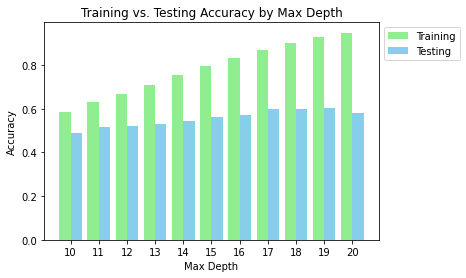

In [26]:
X_axis = np.arange(len(depths))

plt.bar(X_axis - 0.2, train_accs, 0.4, label = 'Training', color = 'lightgreen') 
plt.bar(X_axis + 0.2, test_accs, 0.4, label = 'Testing', color = 'skyblue') 
  
plt.xticks(X_axis, depths)
plt.xlabel('Max Depth') 
plt.ylabel('Accuracy') 
plt.title('Training vs. Testing Accuracy by Max Depth')
plt.legend(bbox_to_anchor = [1, 1], loc = 'upper left') 
plt.show()

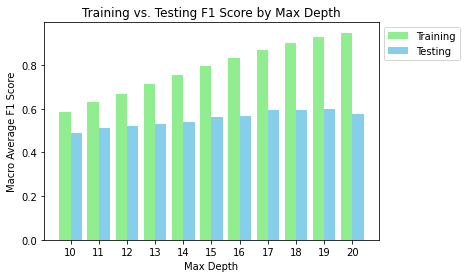

In [27]:
X_axis = np.arange(len(depths))

plt.bar(X_axis - 0.2, train_f1_macros, 0.4, label = 'Training', color = 'lightgreen') 
plt.bar(X_axis + 0.2, test_f1_macros, 0.4, label = 'Testing', color = 'skyblue') 
  
plt.xticks(X_axis, depths)
plt.xlabel('Max Depth') 
plt.ylabel('Macro Average F1 Score') 
plt.title('Training vs. Testing F1 Score by Max Depth')
plt.legend(bbox_to_anchor = [1, 1], loc = 'upper left') 
plt.show()

### Notes on Max Depth  
  
The effects of adjusting max depth are similar to the effects of doing so with the smaller subset that was split 70/30. Training accuracy and f1 trend towards 100% and testing accuracy and f1 appear to level off close to 60%. I'll try adjusting other hyperparamters. If that doesn't work, it should be considered that the feature set isn't great at distinguishing these types of brain activity. This could be because the feature data was extracted from EEG data that wasn't denoised. The only preprocessing work done was standardizing the EEG data. After filtering, artifact handling, and re-referencing, the testing performance may improve.

### Min Samples Split

In [28]:
samples = [(i * 10) for i in range(2, 11)]
train_accs, test_accs, train_f1_macros, test_f1_macros = [], [], [], []
train_f1s, test_f1s = [], []
for s in samples:
    tree = DecisionTreeClassifier(min_samples_split = s)
    tree.fit(X_train, y_train)
    yhat_train = tree.predict(X_train)
    yhat_test = tree.predict(X_test)
    train_accs.append(accuracy_score(y_train, yhat_train))
    test_accs.append(accuracy_score(y_test, yhat_test))
    train_f1_macros.append(f1_score(y_train, yhat_train, average = 'macro'))
    test_f1_macros.append(f1_score(y_test, yhat_test, average = 'macro'))
    train_f1s.append(f1_score(y_train, yhat_train, average = None))
    test_f1s.append(f1_score(y_test, yhat_test, average = None))

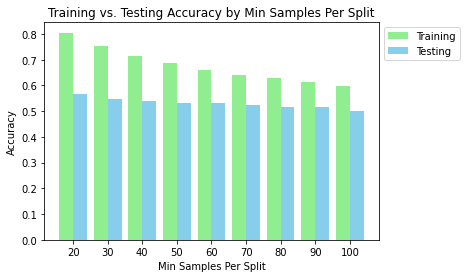

In [29]:
X_axis = np.arange(len(samples))

plt.bar(X_axis - 0.2, train_accs, 0.4, label = 'Training', color = 'lightgreen') 
plt.bar(X_axis + 0.2, test_accs, 0.4, label = 'Testing', color = 'skyblue') 
  
plt.xticks(X_axis, samples)
plt.xlabel('Min Samples Per Split') 
plt.ylabel('Accuracy') 
plt.title('Training vs. Testing Accuracy by Min Samples Per Split')
plt.legend(bbox_to_anchor = [1, 1], loc = 'upper left') 
plt.show()

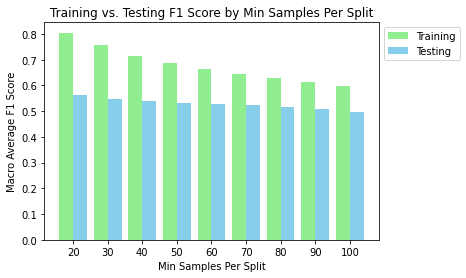

In [30]:
X_axis = np.arange(len(samples))

plt.bar(X_axis - 0.2, train_f1_macros, 0.4, label = 'Training', color = 'lightgreen') 
plt.bar(X_axis + 0.2, test_f1_macros, 0.4, label = 'Testing', color = 'skyblue') 
  
plt.xticks(X_axis, samples)
plt.xlabel('Min Samples Per Split') 
plt.ylabel('Macro Average F1 Score') 
plt.title('Training vs. Testing F1 Score by Min Samples Per Split')
plt.legend(bbox_to_anchor = [1, 1], loc = 'upper left') 
plt.show()

### Min Samples Leaf

In [31]:
samples = [(i * 10) for i in range(1, 11)]
train_accs, test_accs, train_f1_macros, test_f1_macros = [], [], [], []
train_f1s, test_f1s = [], []
for s in samples:
    tree = DecisionTreeClassifier(min_samples_leaf = s)
    tree.fit(X_train, y_train)
    yhat_train = tree.predict(X_train)
    yhat_test = tree.predict(X_test)
    train_accs.append(accuracy_score(y_train, yhat_train))
    test_accs.append(accuracy_score(y_test, yhat_test))
    train_f1_macros.append(f1_score(y_train, yhat_train, average = 'macro'))
    test_f1_macros.append(f1_score(y_test, yhat_test, average = 'macro'))
    train_f1s.append(f1_score(y_train, yhat_train, average = None))
    test_f1s.append(f1_score(y_test, yhat_test, average = None))

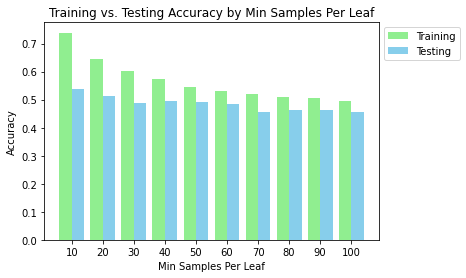

In [32]:
X_axis = np.arange(len(samples))

plt.bar(X_axis - 0.2, train_accs, 0.4, label = 'Training', color = 'lightgreen') 
plt.bar(X_axis + 0.2, test_accs, 0.4, label = 'Testing', color = 'skyblue') 
  
plt.xticks(X_axis, samples)
plt.xlabel('Min Samples Per Leaf') 
plt.ylabel('Accuracy') 
plt.title('Training vs. Testing Accuracy by Min Samples Per Leaf')
plt.legend(bbox_to_anchor = [1, 1], loc = 'upper left') 
plt.show()

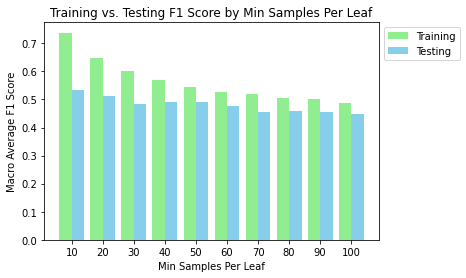

In [33]:
X_axis = np.arange(len(samples))

plt.bar(X_axis - 0.2, train_f1_macros, 0.4, label = 'Training', color = 'lightgreen') 
plt.bar(X_axis + 0.2, test_f1_macros, 0.4, label = 'Testing', color = 'skyblue') 
  
plt.xticks(X_axis, samples)
plt.xlabel('Min Samples Per Leaf') 
plt.ylabel('Macro Average F1 Score') 
plt.title('Training vs. Testing F1 Score by Min Samples Per Leaf')
plt.legend(bbox_to_anchor = [1, 1], loc = 'upper left') 
plt.show()

### Notes on The Above Hyperparameter Adjustments  
  
For both min samples hyperparameters, the training accuracy and f1 scores decrease as the hyperparameter value increases. The trend of this decrease begins to level off around accuracy and f1 of 50%. The testing accuracy and f1 scores decrease very slightly and this very slight decrease appears to level off a little under 50%. That this difference between change in training results and lack thereof in testing results shows up with both of these hyperparameters and with max depth doesn't make sense to me. Maybe the feature set is just weak, but if that's true, why does the model perform better with some classes of the target variable than others?

In [12]:
alpha_values = [(i / 100) for i in range(11)]
train_accs, test_accs, train_f1_macros, test_f1_macros = [], [], [], []
train_f1s, test_f1s = [], []
for a in alpha_values:
    tree = DecisionTreeClassifier(ccp_alpha = a)
    tree.fit(X_train, y_train)
    yhat_train = tree.predict(X_train)
    yhat_test = tree.predict(X_test)
    train_accs.append(accuracy_score(y_train, yhat_train))
    test_accs.append(accuracy_score(y_test, yhat_test))
    train_f1_macros.append(f1_score(y_train, yhat_train, average = 'macro'))
    test_f1_macros.append(f1_score(y_test, yhat_test, average = 'macro'))
    train_f1s.append(f1_score(y_train, yhat_train, average = None))
    test_f1s.append(f1_score(y_test, yhat_test, average = None))

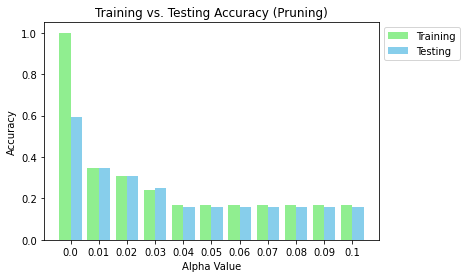

In [13]:
X_axis = np.arange(len(alpha_values))

plt.bar(X_axis - 0.2, train_accs, 0.4, label = 'Training', color = 'lightgreen') 
plt.bar(X_axis + 0.2, test_accs, 0.4, label = 'Testing', color = 'skyblue') 
  
plt.xticks(X_axis, alpha_values)
plt.xlabel('Alpha Value') 
plt.ylabel('Accuracy') 
plt.title('Training vs. Testing Accuracy (Pruning)')
plt.legend(bbox_to_anchor = [1, 1], loc = 'upper left') 
plt.show()

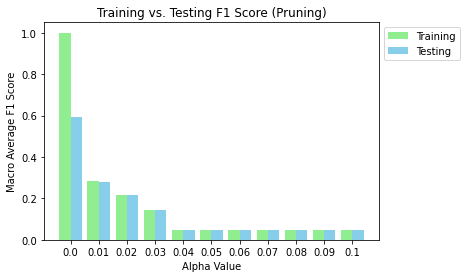

In [41]:
X_axis = np.arange(len(alpha_values))

plt.bar(X_axis - 0.2, train_f1_macros, 0.4, label = 'Training', color = 'lightgreen') 
plt.bar(X_axis + 0.2, test_f1_macros, 0.4, label = 'Testing', color = 'skyblue') 
  
plt.xticks(X_axis, alpha_values)
plt.xlabel('Alpha Value') 
plt.ylabel('Macro Average F1 Score') 
plt.title('Training vs. Testing F1 Score (Pruning)')
plt.legend(bbox_to_anchor = [1, 1], loc = 'upper left') 
plt.show()

### Getting Power Spectrum Plot Example

In [54]:
raw_lrda = load_scale(grda_df, 25)

Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 10000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.


Effective window size : 10.240 (s)


/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


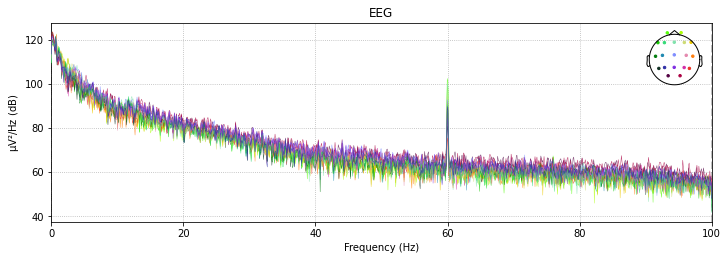

In [55]:
raw_lrda.compute_psd(picks = 'eeg').plot()
plt.show()

In [56]:
def plot_psd(raw):
    raw.compute_psd(picks = 'eeg').plot()
    plt.show()

def psd_plots(data, n):
    rows = [i for i in range(data.shape[0])]
    random_rows = np.random.choice(rows, size = n, replace = False)
    for i in random_rows:
        raw = load_scale(data, i)
        plot_psd(raw)

Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 10000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Effective window size : 10.240 (s)


/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


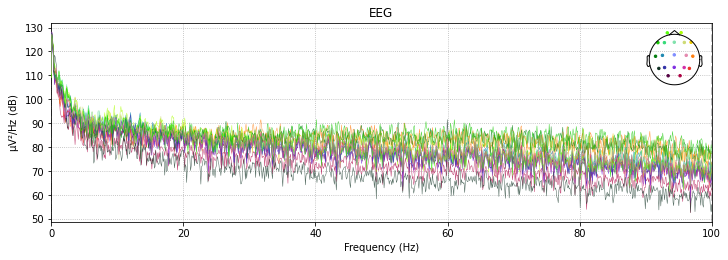

Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 10000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Effective window size : 10.240 (s)


/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


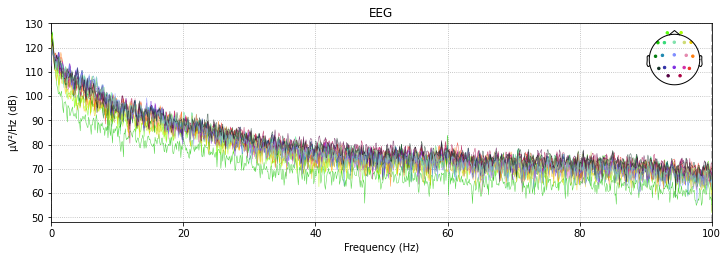

Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 10000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Effective window size : 10.240 (s)


/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


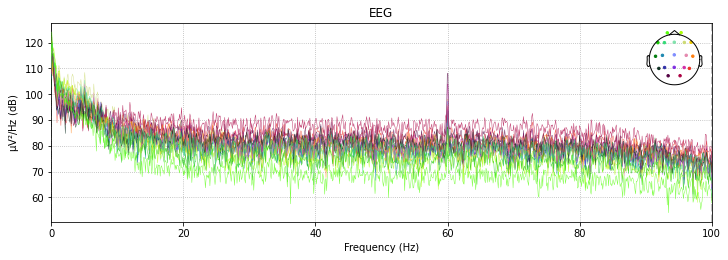

Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 10000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Effective window size : 10.240 (s)


/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


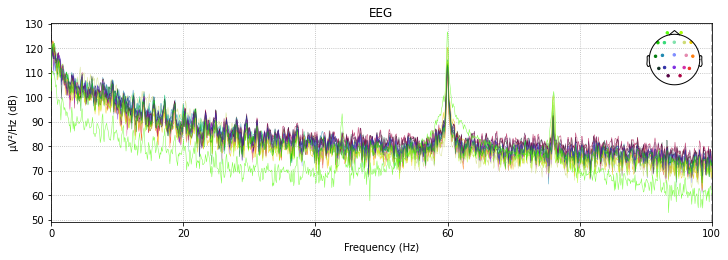

Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 10000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Effective window size : 10.240 (s)


/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


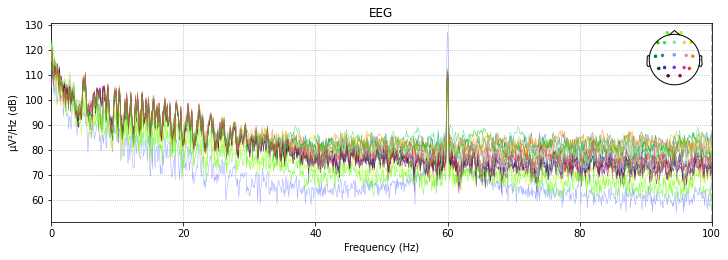

Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 10000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Effective window size : 10.240 (s)


/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


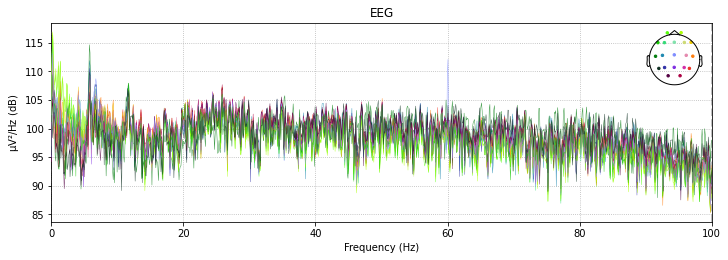

Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 10000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Effective window size : 10.240 (s)


/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


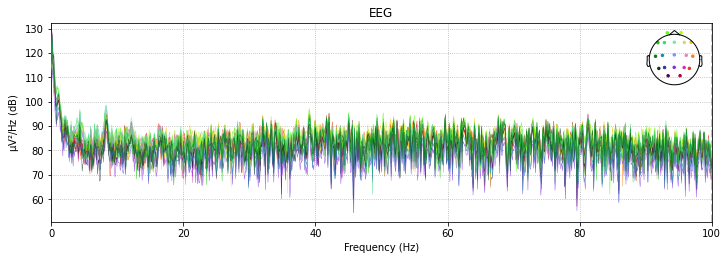

Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 10000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Effective window size : 10.240 (s)


/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


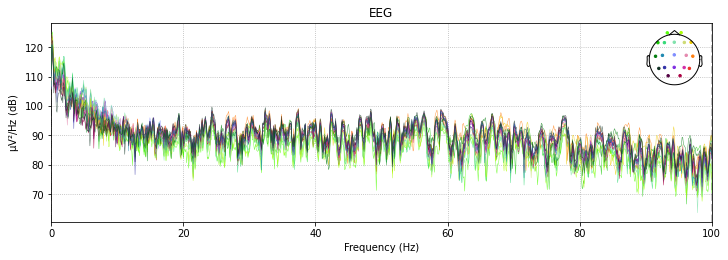

Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 10000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Effective window size : 10.240 (s)


/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


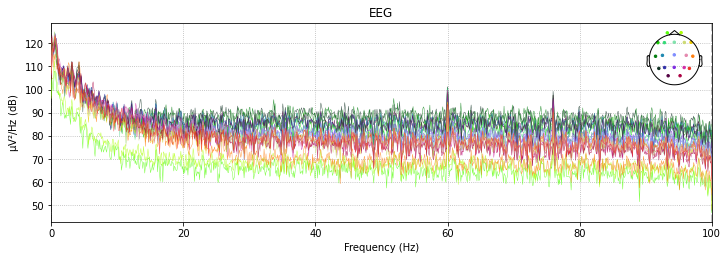

Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 10000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Effective window size : 10.240 (s)


/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


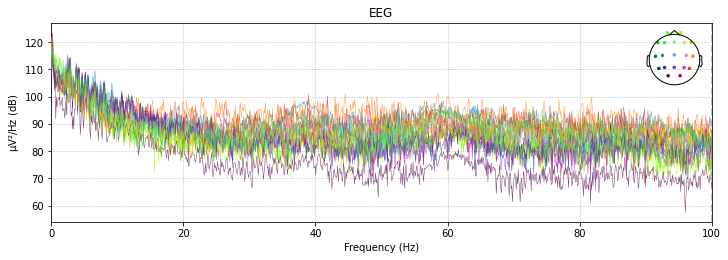

Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 10000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Effective window size : 10.240 (s)


/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


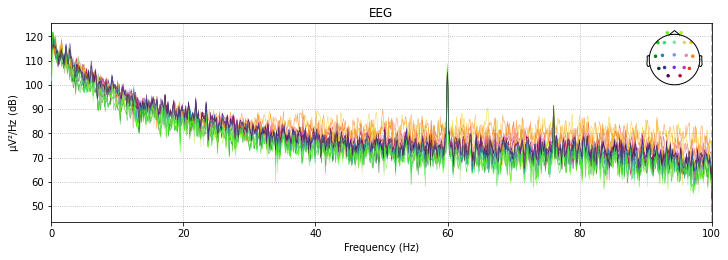

Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 10000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Effective window size : 10.240 (s)


/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


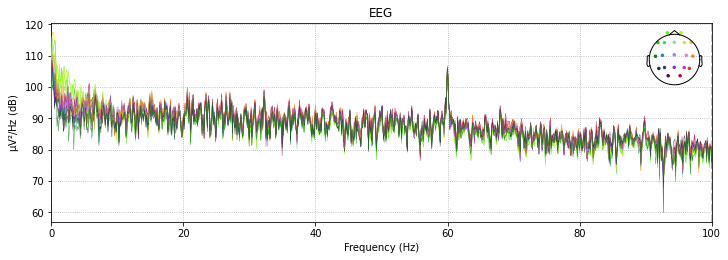

Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 10000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Effective window size : 10.240 (s)


/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


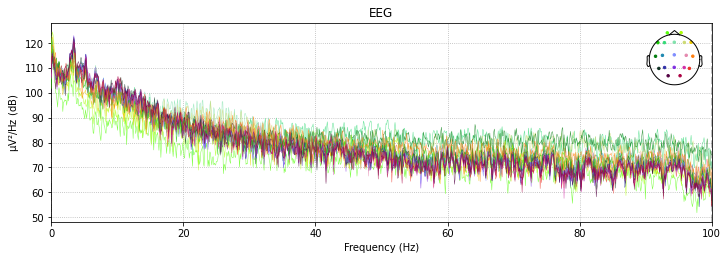

Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 10000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Effective window size : 10.240 (s)


/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


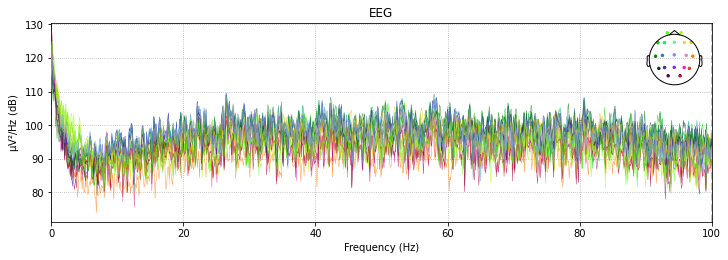

Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 10000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Effective window size : 10.240 (s)


/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


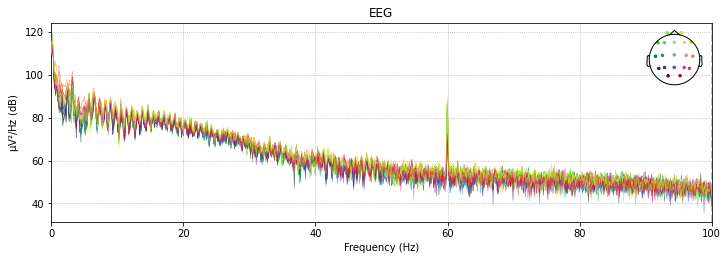

Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 10000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Effective window size : 10.240 (s)


/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


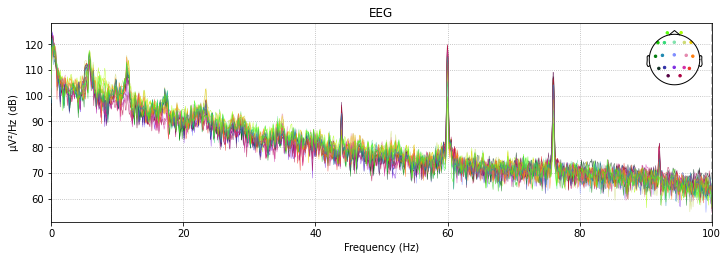

Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 10000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Effective window size : 10.240 (s)


/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


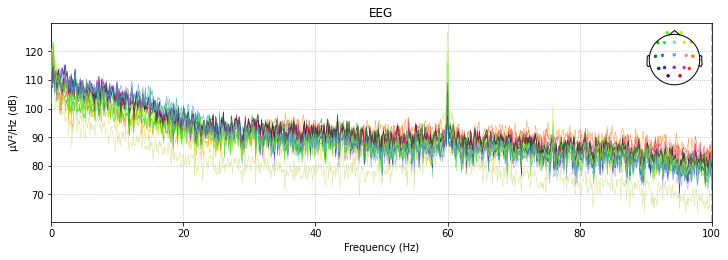

Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 10000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Effective window size : 10.240 (s)


/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


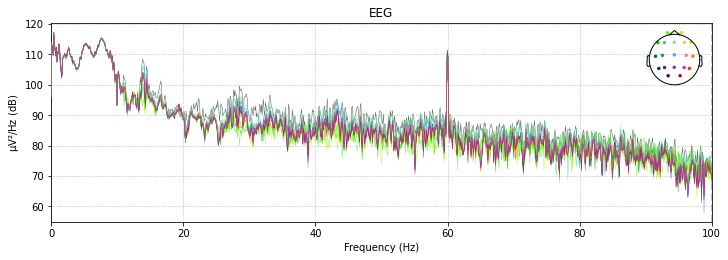

Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 10000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Effective window size : 10.240 (s)


/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


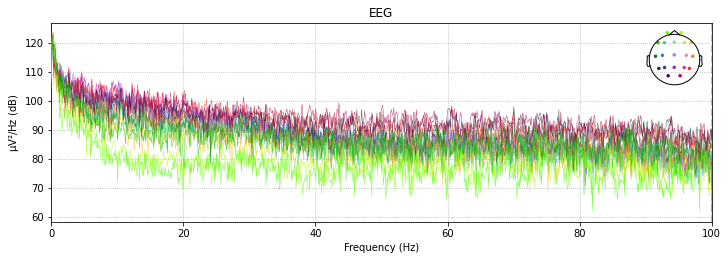

Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 10000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=20, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.
Effective window size : 10.240 (s)


/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


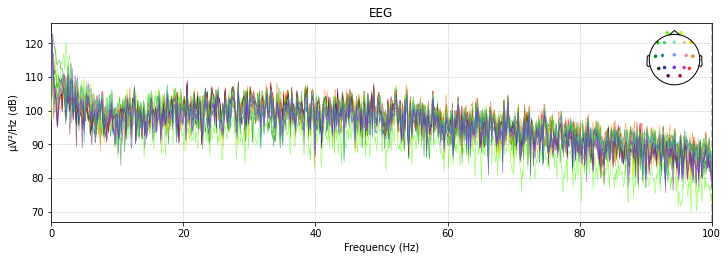

In [63]:
psd_plots(seizure_df, 20)